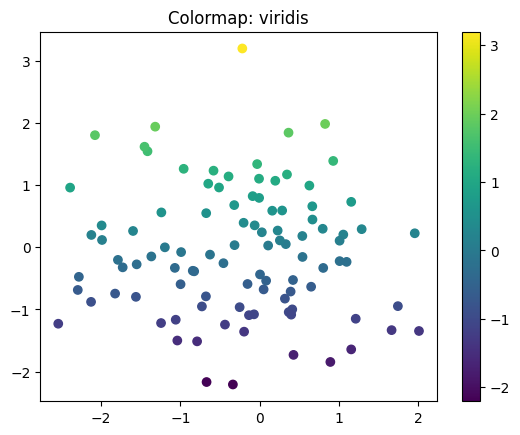

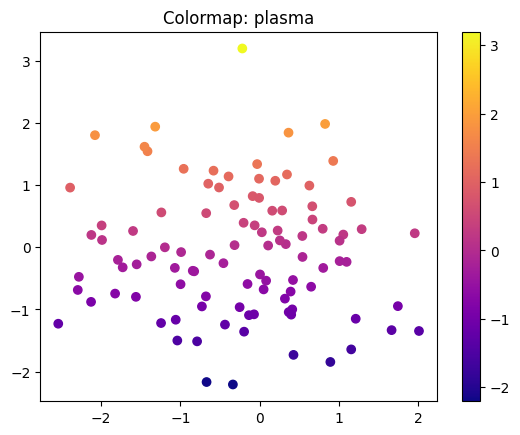

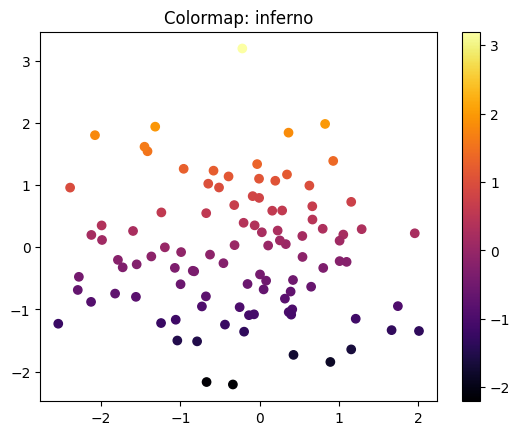

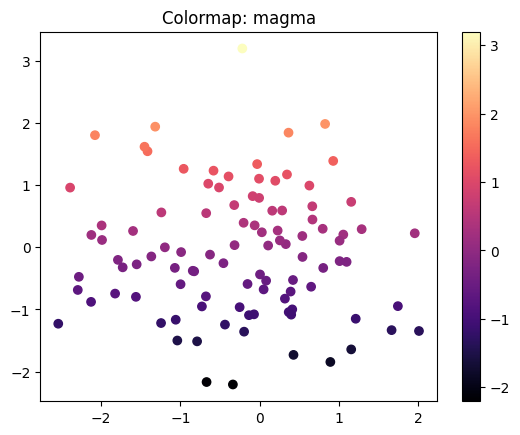

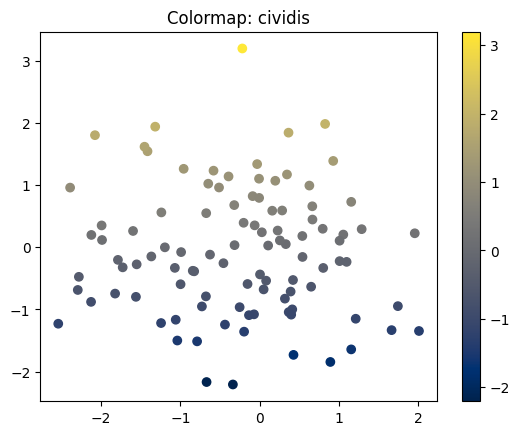

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.normal(loc=0, scale=1, size=100)
y = np.random.normal(loc=0, scale=1, size=100)

# Test different colormap colors
for cmap in ['viridis', 'plasma', 'inferno', 'magma', 'cividis']:
    plt.figure()
    plt.scatter(x, y, c=y, cmap=cmap)
    plt.colorbar()
    plt.title(f"Colormap: {cmap}")
    plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import  load_model

centroids = np.load("../Data/HIV/centroids.npy")
# centroids = np.array([np.round(mz, 4) for mz in centroids])
# mzs = np.load("../Data/HIV/mzs.npy")

decoder = load_model("../Models/Decoder/decoder.keras")


In [ ]:
out = decoder.predict(centroids)
del decoder
del centroids

In [ ]:
print(f"Shape: {out.shape}")

In [ ]:
np.savetxt("../c1y.txt", out[0], fmt="%.4f")
np.savetxt("../c2y.txt", out[1], fmt="%.4f")
np.savetxt("../c3y.txt", out[2], fmt="%.4f")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error



from sklearn.model_selection import train_test_split



class SpectrumAutoencoder(Model):
    def __init__(self, latent_dim, n_peaks):
        super(SpectrumAutoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.n_peaks = n_peaks
        
        self.encoder = tf.keras.Sequential([
            layers.Dense(5000, activation='relu'),
            layers.Dense(1000, activation='relu'),
            layers.Dense(latent_dim, activation='relu'),
        ])

        self.decoder = tf.keras.Sequential([
            layers.Dense(1000, activation='relu'),
            layers.Dense(5000, activation='relu'),
            layers.Dense(n_peaks, activation='relu'),  
        ])

    def call(self, intensities):
        encoded = self.encoder(intensities)
        decoded_intensities = self.decoder(encoded)
        return decoded_intensities

In [ ]:
X = np.load("../Data/LPS/sal_st_x_x.npy")
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

latent_dim = 500 
input_dim = X_train.shape[1]  


autoencoder = SpectrumAutoencoder(latent_dim=latent_dim, n_peaks=input_dim)

autoencoder.compile(
    optimizer='adam',
    loss='mse',  
    metrics=['mae','mse']  
)

print(f"Autoencoder created with latent_dim={latent_dim}, input_dim={input_dim}")


In [ ]:
# Training the autoencoder
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

print(f"Training data stats:")
print(f"  Shape: {X_train.shape}")
print(f"  Min: {X_train.min():.6f}, Max: {X_train.max():.6f}")
print(f"  Mean: {X_train.mean():.6f}, Std: {X_train.std():.6f}")


print("Starting training...")
history = autoencoder.fit(
    X_train, X_train,  
    epochs=10,  
    batch_size=32,
    validation_data=(X_test, X_test),
    callbacks=[early_stopping],
    verbose=0

)

print("Training completed!")